<h1>k-Means algorithm</h1>
<br>
Unsupervised algorithm that does not really learn in a way that machine learning algorithms learn.
<br>
User defines number of categories - <b>k</b>. The datapoints are going to be assigned to a cluster centre with the nearest <b>centroid</b>. At the <b>initial</b> stage, the centroids are randomly assigned. Using <b>Euclidean distance calculation</b>, the datapoints are assigned to a cluster centre.
<br>
During the learning process, the centroids are first moved to the centre of their respective cluster centre. New position is assigned by calculating the <b>mean</b> of the datapoints in the respective cluster centre.
<br>
Then, each datapoints checks the distance to every centroid and is assigned to the closest one.
<br>
This continues as long as centroids are moving.

In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np

<h2>The class</h2>
<br>
Method learning is the main method. A block of methods for plotting data is in the second half of the class.


In [2]:
class kmeans():
    def __init__(self):
        plt.rcParams['axes.facecolor'] = '#d3d3d3' #grey background on graphs to show white lines/dots
        #pass

    ## split dataset into 2 features x and y
    def get_data(self, datapoints):
        return datapoints[:, 0], datapoints[:, 1]

    # Euclidean Distance Calculation
    def eucl_dist_calc(self, a, b):
        return np.linalg.norm(a - b)

    ## method evaluates each points against each centroid nd assignes the point to a cluster
    # method takes a point (value) and centroids and returns index of centroid with minimum
    # euclidean distance between a point and all centroids
    def dist(self, value, centroids):
        centroid_distances = [self.eucl_dist_calc(a=value, b=x) for x in centroids]
        return np.argmin(centroid_distances)

    def calculate_euclidean_distance(self, centroids, datapoints):
        datapoints_centroids = [self.dist(x, centroids) for x in datapoints]
        return datapoints_centroids

    # method calculates centroids based on points in the cluster centre
    def calculate_centroids(self, centroids, datapoints, cluster_centre_index):
        new_centroids = np.zeros(centroids.shape)
        for i in range(len(centroids)):
            points = [datapoints[j] for j in range(len(datapoints)) if cluster_centre_index[j] == i]
            new_centroids[i] = np.mean(points, axis=0)
            #print(self.eucl_dist_calc(centroids[i], new_centroids[i]))
        return new_centroids

    ###############
    ## learning ##
    #############

    def learning(self, n_centroids, datapoints):
        i = 0 # counter for while loop
        l_centroids = [] # list of centroids and their changes for each learning step
        l_eucl_dist_centroids = [] # list of centroids' euclidean distances
        centroid_distance = 1 # centroid distance is a non-zero scalar to enter the while loop

        #1 initialize centroids
        centroids = np.array([np.random.randint(0, 40, size=n_centroids * 2)]).reshape(n_centroids, 2)
        l_initial_centroids = centroids

        while centroid_distance != 0: # centroid distance zero means old centroids and new centroids are the same
            i += 1
            #2 group datapoints to closest centroids
            datapoints_centroids = self.calculate_euclidean_distance(centroids=centroids, datapoints=datapoints)
            if i == 1: # save the datapoint grouping for first repeat
                l_first_datapoint_grouping = datapoints_centroids
            l_last_datapoint_grouping = datapoints_centroids # save the datapoint grouping for last repeat
            #3 calculate new centroids
            new_centroids = self.calculate_centroids(centroids=centroids, datapoints=datapoints, cluster_centre_index=datapoints_centroids)
            #4 calculate euclidean distance between old and new centroids
            centroid_distance = self.eucl_dist_calc(centroids, new_centroids)
            l_centroids.append(centroids)
            l_eucl_dist_centroids.append(centroid_distance)

            #5 new centroids become centroids
            centroids = new_centroids

        return l_initial_centroids, l_first_datapoint_grouping, l_last_datapoint_grouping, l_centroids, l_eucl_dist_centroids

    ####################
    ## visualization ##
    ##################

    ## get color based in input index
    def get_color(self, index):
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        return colors[index]

    ## plot initial data
    def plot_data(self, values):
        value1, value2 = self.get_data(values)
        plt.scatter(value1, value2, c="black", s=7)

    ## plot centroids
    def plot_centroids(self, centroids, max_axis, size=100):
        centroid1, centroid2 = self.get_data(centroids)
        plt.xlim([0, max_axis])
        plt.ylim([0, max_axis])
        for i in range(centroid1.shape[0]):
            plt.scatter(centroid1[i], centroid2[i], c=self.get_color(i), marker='*', s=size)

    ## plot centers, group them by color
    def plot_cluster_centre(self, datapoints, cluster_centre_index):
        for i in range(len(datapoints)):
            plt.scatter(datapoints[i][0], datapoints[i][1], c=self.get_color(cluster_centre_index[i]), marker="o", s=7)

    ## plot Euclidean distance value of the centroids
    def plot_centroids_euclidean_dist(self, l_eucl_dist_centroids):
        print([ '%.3f' % x for x in l_eucl_dist_centroids])
        plt.plot(l_eucl_dist_centroids, "bo")
        plt.plot(l_eucl_dist_centroids)
        plt.title("Euclidean distance between previous and \n actual centroid during learning")

In [3]:
#np.random.seed(19) #uncomment this if you want to run multiple times and get the same random values

<h2>Input</h2>
Value for <i>n_features</i> should stay 2 in order to plot the data easier - 2D.
<br>
Value for <i>n_rows</i> is used to define number of datapoints. Awkward name perhaps.
<br>
Value for <i>max_num</i> defines the upper limit for interval random integers are taken from.
<br>
<b>Note:</b> Value for n_rows must be equal or bigger than value for max_num.

In [4]:
n_features = 2  # dimensions, leave 2 for plotting and better understanding
n_rows = 400
max_num = 40
n_cluster_centres = 6  # limited to 8 because of number of colors when drawing the clustered graph
datapoints = np.array([np.random.randint(0, max_num, size=n_rows * n_features)]).reshape(n_rows, n_features)  # generate datapoints
initial_centroids = np.array([np.random.randint(0, max_num, size=n_cluster_centres *2)]).reshape(n_cluster_centres, n_features)

In [5]:
k = kmeans()

In [6]:
l_initial_centroids, l_first_datapoint_grouping, l_last_datapoint_grouping, l_centroids, l_eucl_dist_centroids = k.learning(n_centroids=n_cluster_centres, datapoints=datapoints)

<h2>Plotting the datapoints</h2>

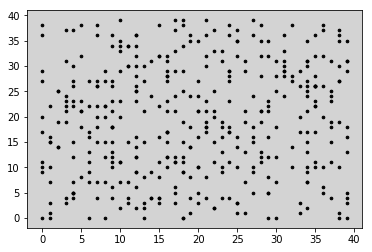

In [7]:
k.plot_data(values=datapoints)

<h2>Plotting the initial (random) centroids</h2>

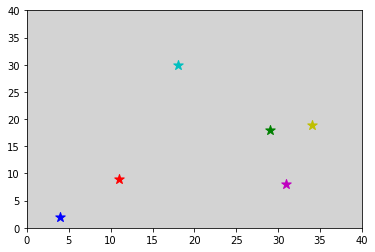

In [8]:
k.plot_centroids(centroids=l_initial_centroids, max_axis=max_num)

<h2>Plotting the datapoints together with initial centroids</h2>

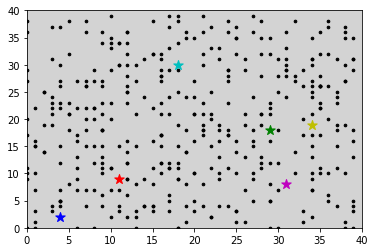

In [9]:
k.plot_data(values=datapoints)
k.plot_centroids(centroids=l_initial_centroids, max_axis=max_num)

<h2>Grouping points to the nearest cluster centres</h2>

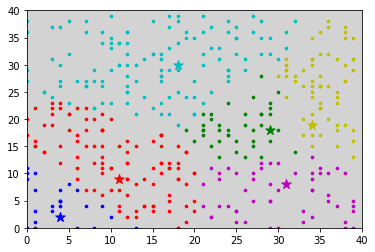

In [10]:
k.plot_cluster_centre(datapoints=datapoints, cluster_centre_index=l_first_datapoint_grouping)
k.plot_centroids(centroids=l_initial_centroids, max_axis=max_num)

<h1>Learning process</h1>

<h4>Learning process is a loop that moves the centroid of each cluster centre to the mean of that cluster. Then the distance to each cluster centre is computed again and datapoints are assigned to (new) centroid. <br>
This stops repeating once the centroids stop moving.</h4>

<h2>Centroids' Euclidean distance</h2>
<h4>Once the distance is zero, the learning stops</h4>

['9.883', '4.196', '3.159', '2.395', '2.015', '2.212', '1.432', '0.453', '0.345', '0.289', '0.358', '0.252', '0.170', '0.000']


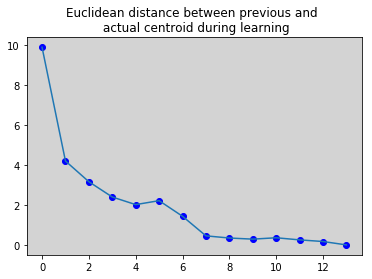

In [11]:
k.plot_centroids_euclidean_dist(l_eucl_dist_centroids=l_eucl_dist_centroids)

<h2>Final plot - centroids have stopped moving</h2>

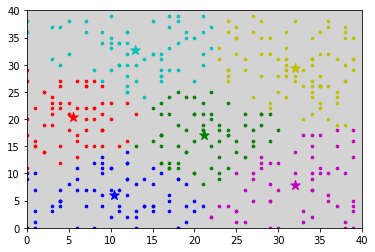

In [12]:
k.plot_cluster_centre(datapoints=datapoints, cluster_centre_index=l_last_datapoint_grouping)
last_centroid_positions = np.array(l_centroids)[len(l_centroids)-1]
k.plot_centroids(centroids=last_centroid_positions, max_axis=max_num)